MEDICAL COST PREDICTION MODEL USING AGE,  BMI, AND NUMBER OF PROCEDURE OF A PATIENT

K LIPIKA SHREE
USN: 1CD24AI050

In [276]:
!pip install pandas numpy scikit-learn matplotlib seaborn


In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [278]:
df = pd.read_csv("/content/medical_costs (1).csv")
df.head()


,age,bmi,procedures_count,smoking_status,alcohol_consumption,chronic_conditions,insurance_plan,hospital_tier,geographic_region,specialty_consultations,diagnostic_tests,emergency_visit,preventive_care,total_cost_usd
0,62.0,42.313469,5.0,Non-smoker,Moderate,2.0,Medicare,Tier 2,West,1.0,5.0,Yes,No,21075.419494
1,40.0,41.724356,5.0,Former,Moderate,3.0,PPO,Tier 2,Northeast,0.0,1.0,No,Yes,43051.670377
2,80.0,37.685282,5.0,Non-smoker,Moderate,3.0,PPO,Tier 2,Midwest,1.0,0.0,No,NaN,101842.593944
3,NaN,26.635665,7.0,Non-smoker,NaN,1.0,Medicare,Tier 3,Midwest,1.0,4.0,No,No,97861.509012
4,62.0,44.367618,NaN,Non-smoker,NaN,3.0,HMO,Tier 1,West,NaN,4.0,No,No,NaN


In [279]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      950 non-null    float64
 1   bmi                      954 non-null    float64
 2   procedures_count         946 non-null    float64
 3   smoking_status           947 non-null    object 
 4   alcohol_consumption      690 non-null    object 
 5   chronic_conditions       952 non-null    float64
 6   insurance_plan           944 non-null    object 
 7   hospital_tier            958 non-null    object 
 8   geographic_region        949 non-null    object 
 9   specialty_consultations  949 non-null    float64
 10  diagnostic_tests         950 non-null    float64
 11  emergency_visit          957 non-null    object 
 12  preventive_care          953 non-null    object 
 13  total_cost_usd           951 non-null    float64
dtypes: float64(7), object(7)


In [280]:

df.head()

,age,bmi,procedures_count,smoking_status,alcohol_consumption,chronic_conditions,insurance_plan,hospital_tier,geographic_region,specialty_consultations,diagnostic_tests,emergency_visit,preventive_care,total_cost_usd
0,62.0,42.313469,5.0,Non-smoker,Moderate,2.0,Medicare,Tier 2,West,1.0,5.0,Yes,No,21075.419494
1,40.0,41.724356,5.0,Former,Moderate,3.0,PPO,Tier 2,Northeast,0.0,1.0,No,Yes,43051.670377
2,80.0,37.685282,5.0,Non-smoker,Moderate,3.0,PPO,Tier 2,Midwest,1.0,0.0,No,NaN,101842.593944
3,NaN,26.635665,7.0,Non-smoker,NaN,1.0,Medicare,Tier 3,Midwest,1.0,4.0,No,No,97861.509012
4,62.0,44.367618,NaN,Non-smoker,NaN,3.0,HMO,Tier 1,West,NaN,4.0,No,No,NaN


In [281]:

df.isnull().sum()


,0
age,50
bmi,46
procedures_count,54
smoking_status,53
alcohol_consumption,310
chronic_conditions,48
insurance_plan,56
hospital_tier,42
geographic_region,51
specialty_consultations,51


<Axes: xlabel='None', ylabel='None'>

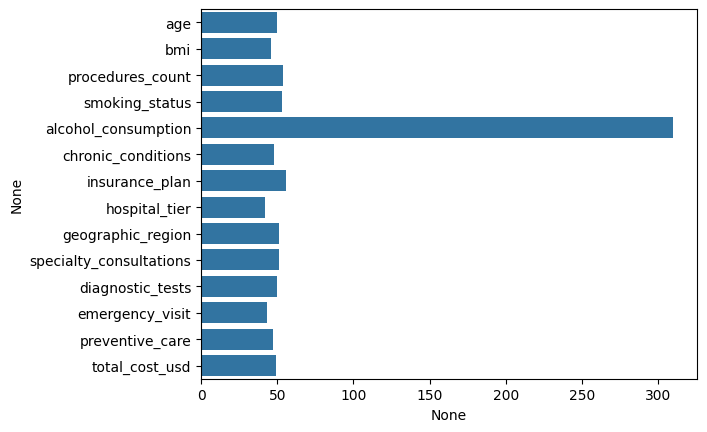

In [282]:
sns.barplot(x=df.isnull().sum(),
            y=df.isnull().sum().index)

In [283]:
df["smoking_status"].fillna(df["smoking_status"].mode()[0], inplace=True)
df["alcohol_consumption"].fillna(df["alcohol_consumption"].mode()[0], inplace=True)
df["insurance_plan"].fillna(df["insurance_plan"].mode()[0], inplace=True)
df["hospital_tier"].fillna(df["hospital_tier"].mode()[0], inplace=True)
df["geographic_region"].fillna(df["geographic_region"].mode()[0], inplace=True)
df["emergency_visit"].fillna(df["emergency_visit"].mode()[0], inplace=True)
df["preventive_care"].fillna(df["preventive_care"].mode()[0], inplace=True)



/tmp/ipython-input-137087071.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["smoking_status"].fillna(df["smoking_status"].mode()[0], inplace=True)
/tmp/ipython-input-137087071.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

In [284]:
df["age"].fillna(df["age"].median(), inplace=True)
df["bmi"].fillna(df["bmi"].median(), inplace=True)
df["procedures_count"].fillna(df["procedures_count"].median(), inplace=True)
df["total_cost_usd"].fillna(df["total_cost_usd"].median(), inplace=True)
df["chronic_conditions"].fillna(df["chronic_conditions"].median(), inplace=True)
df["specialty_consultations"].fillna(df["specialty_consultations"].median(), inplace=True)
df["diagnostic_tests"].fillna(df["diagnostic_tests"].median(), inplace=True)





/tmp/ipython-input-2031774154.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].median(), inplace=True)
/tmp/ipython-input-2031774154.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [285]:
df.isnull().sum()


,0
age,0
bmi,0
procedures_count,0
smoking_status,0
alcohol_consumption,0
chronic_conditions,0
insurance_plan,0
hospital_tier,0
geographic_region,0
specialty_consultations,0


In [286]:
df = pd.get_dummies(df)

In [287]:
df

,age,bmi,procedures_count,chronic_conditions,specialty_consultations,diagnostic_tests,total_cost_usd,smoking_status_Current,smoking_status_Former,smoking_status_Non-smoker,alcohol_consumption_Heavy,alcohol_consumption_Light,alcohol_consumption_Moderate,insurance_plan_HMO,insurance_plan_Medicaid,insurance_plan_Medicare,insurance_plan_PPO,insurance_plan_Uninsured,hospital_tier_Tier 1,hospital_tier_Tier 2,hospital_tier_Tier 3,geographic_region_Midwest,geographic_region_Northeast,geographic_region_South,geographic_region_West,emergency_visit_No,emergency_visit_Yes,preventive_care_No,preventive_care_Yes
0,62.0,42.313469,5.0,2.0,1.0,5.0,21075.419494,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True,False,True,True,False
1,40.0,41.724356,5.0,3.0,0.0,1.0,43051.670377,False,True,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True
2,80.0,37.685282,5.0,3.0,1.0,0.0,101842.593944,False,False,True,False,False,True,False,False,False,True,False,False,True,False,True,False,False,False,True,False,True,False
3,52.0,26.635665,7.0,1.0,1.0,4.0,97861.509012,False,False,True,False,False,True,False,False,True,False,False,False,False,True,True,False,False,False,True,False,True,False
4,62.0,44.367618,4.0,3.0,2.0,4.0,76272.799810,False,False,True,False,False,True,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,84.0,23.577806,6.0,1.0,3.0,2.0,104857.843251,False,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,False,False,True,True,False
996,67.0,37.601873,6.0,3.0,3.0,5.0,9347.405138,False,True,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,True,False,False,True
997,75.0,40.170054,5.0,0.0,1.0,0.0,80275.930565,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False,True
998,26.0,27.412278,6.0,0.0,3.0,3.0,57358.939493,False,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,True,False,True


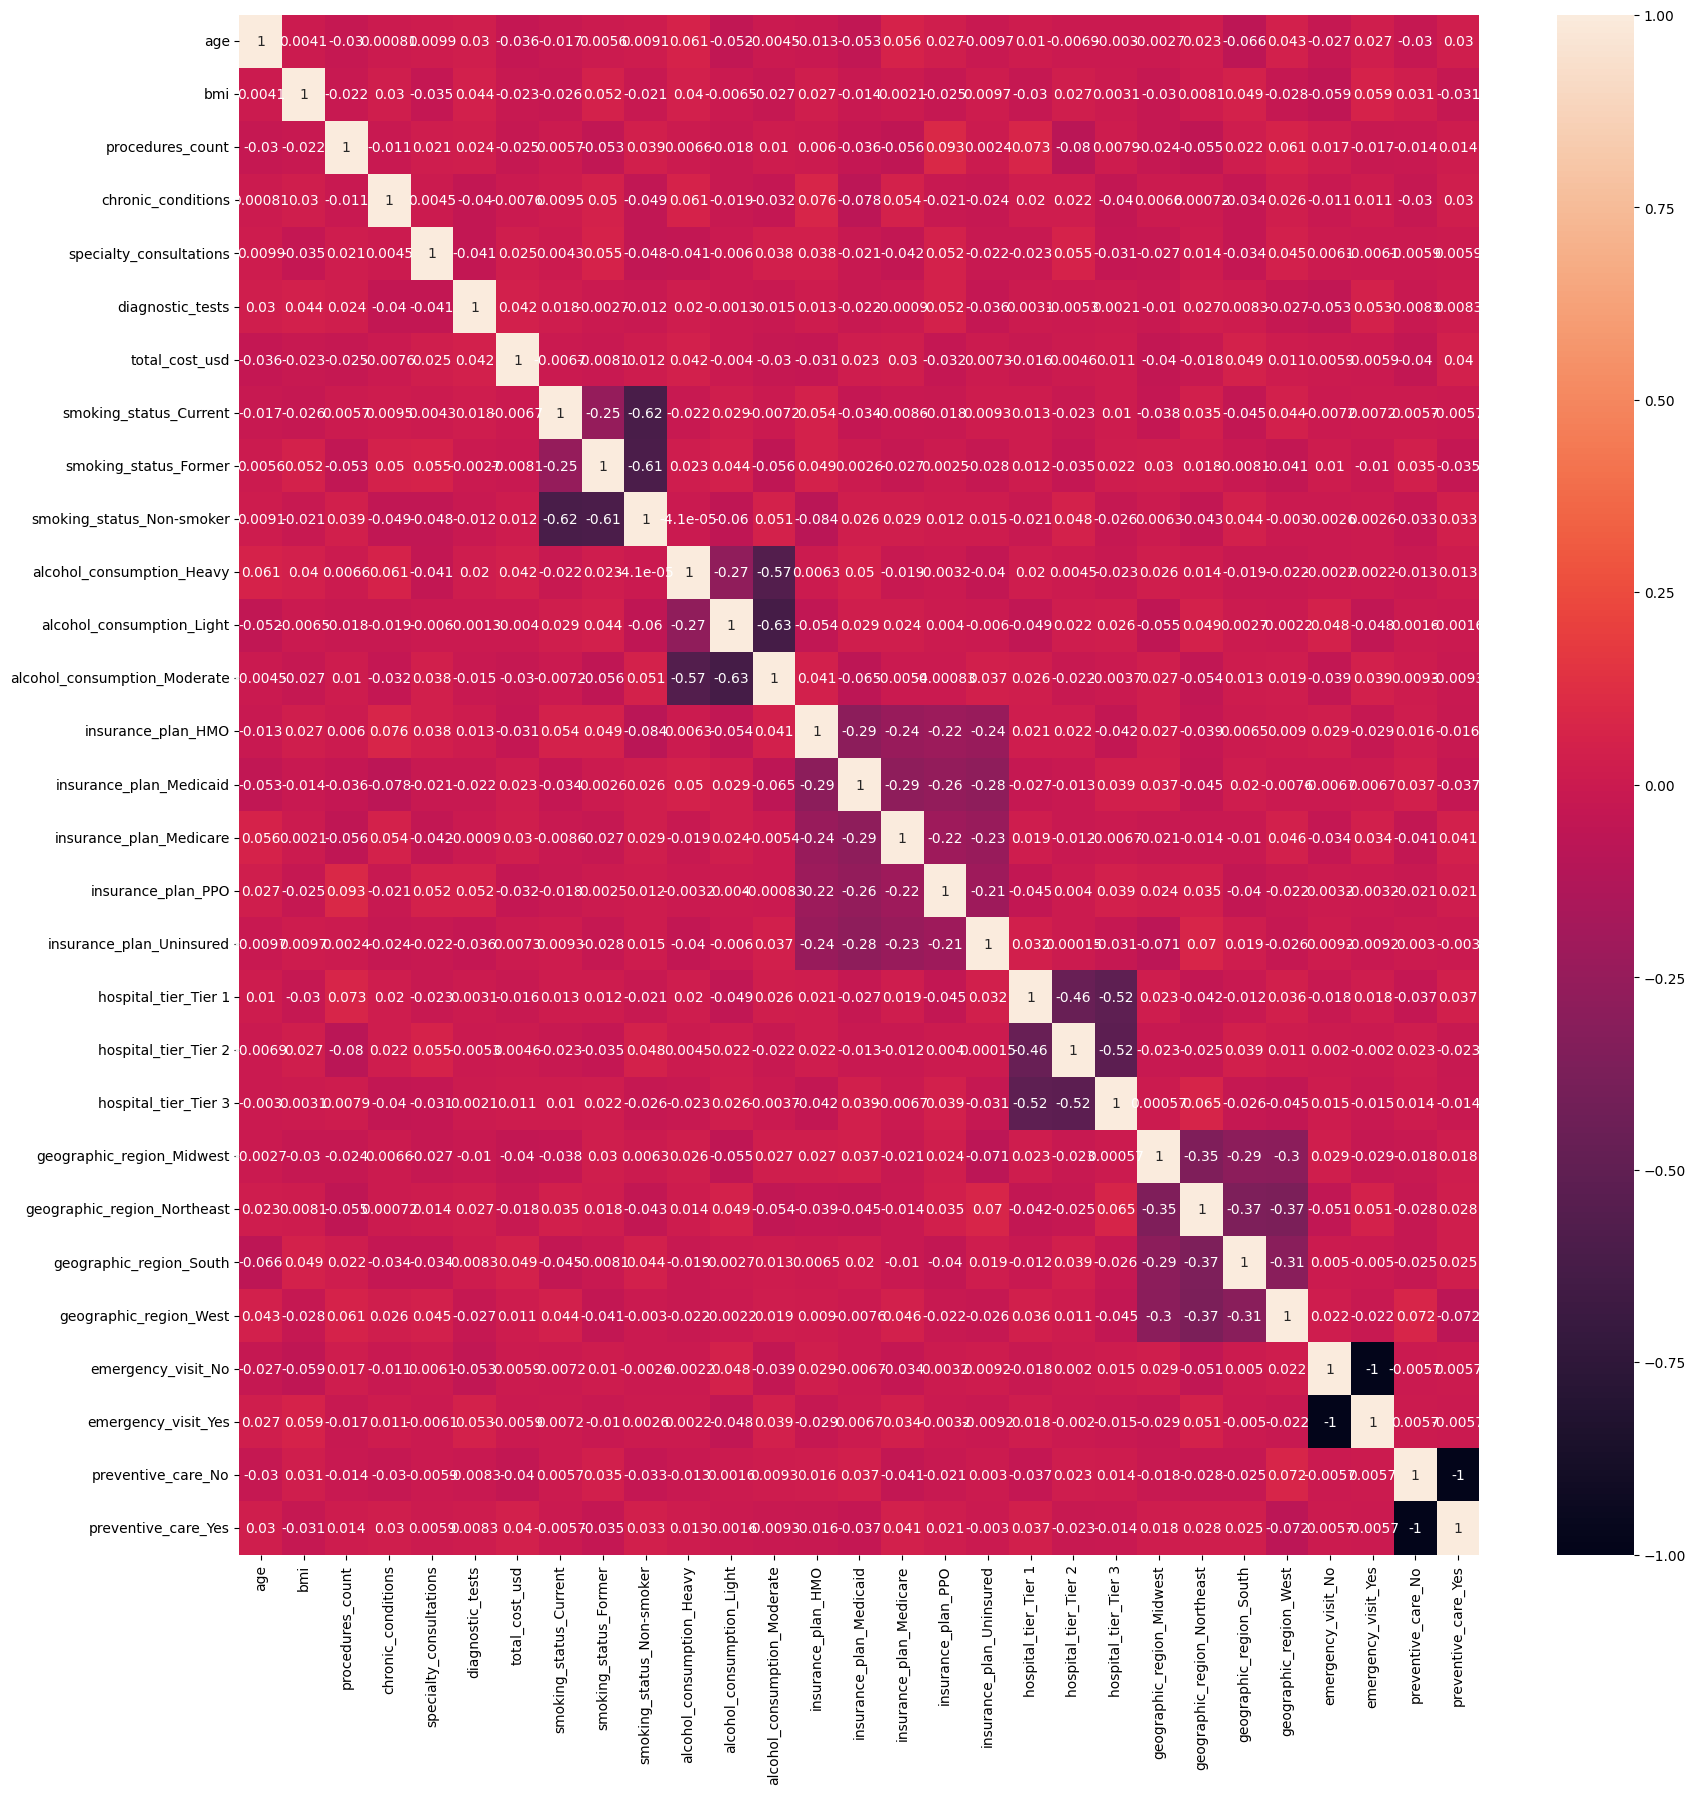

In [288]:
plt.figure(figsize=(20, 20))

sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

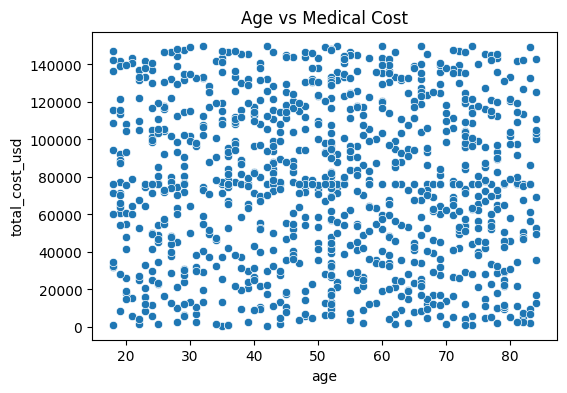

In [289]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='age', y='total_cost_usd', data=df)
plt.title("Age vs Medical Cost")
plt.show()


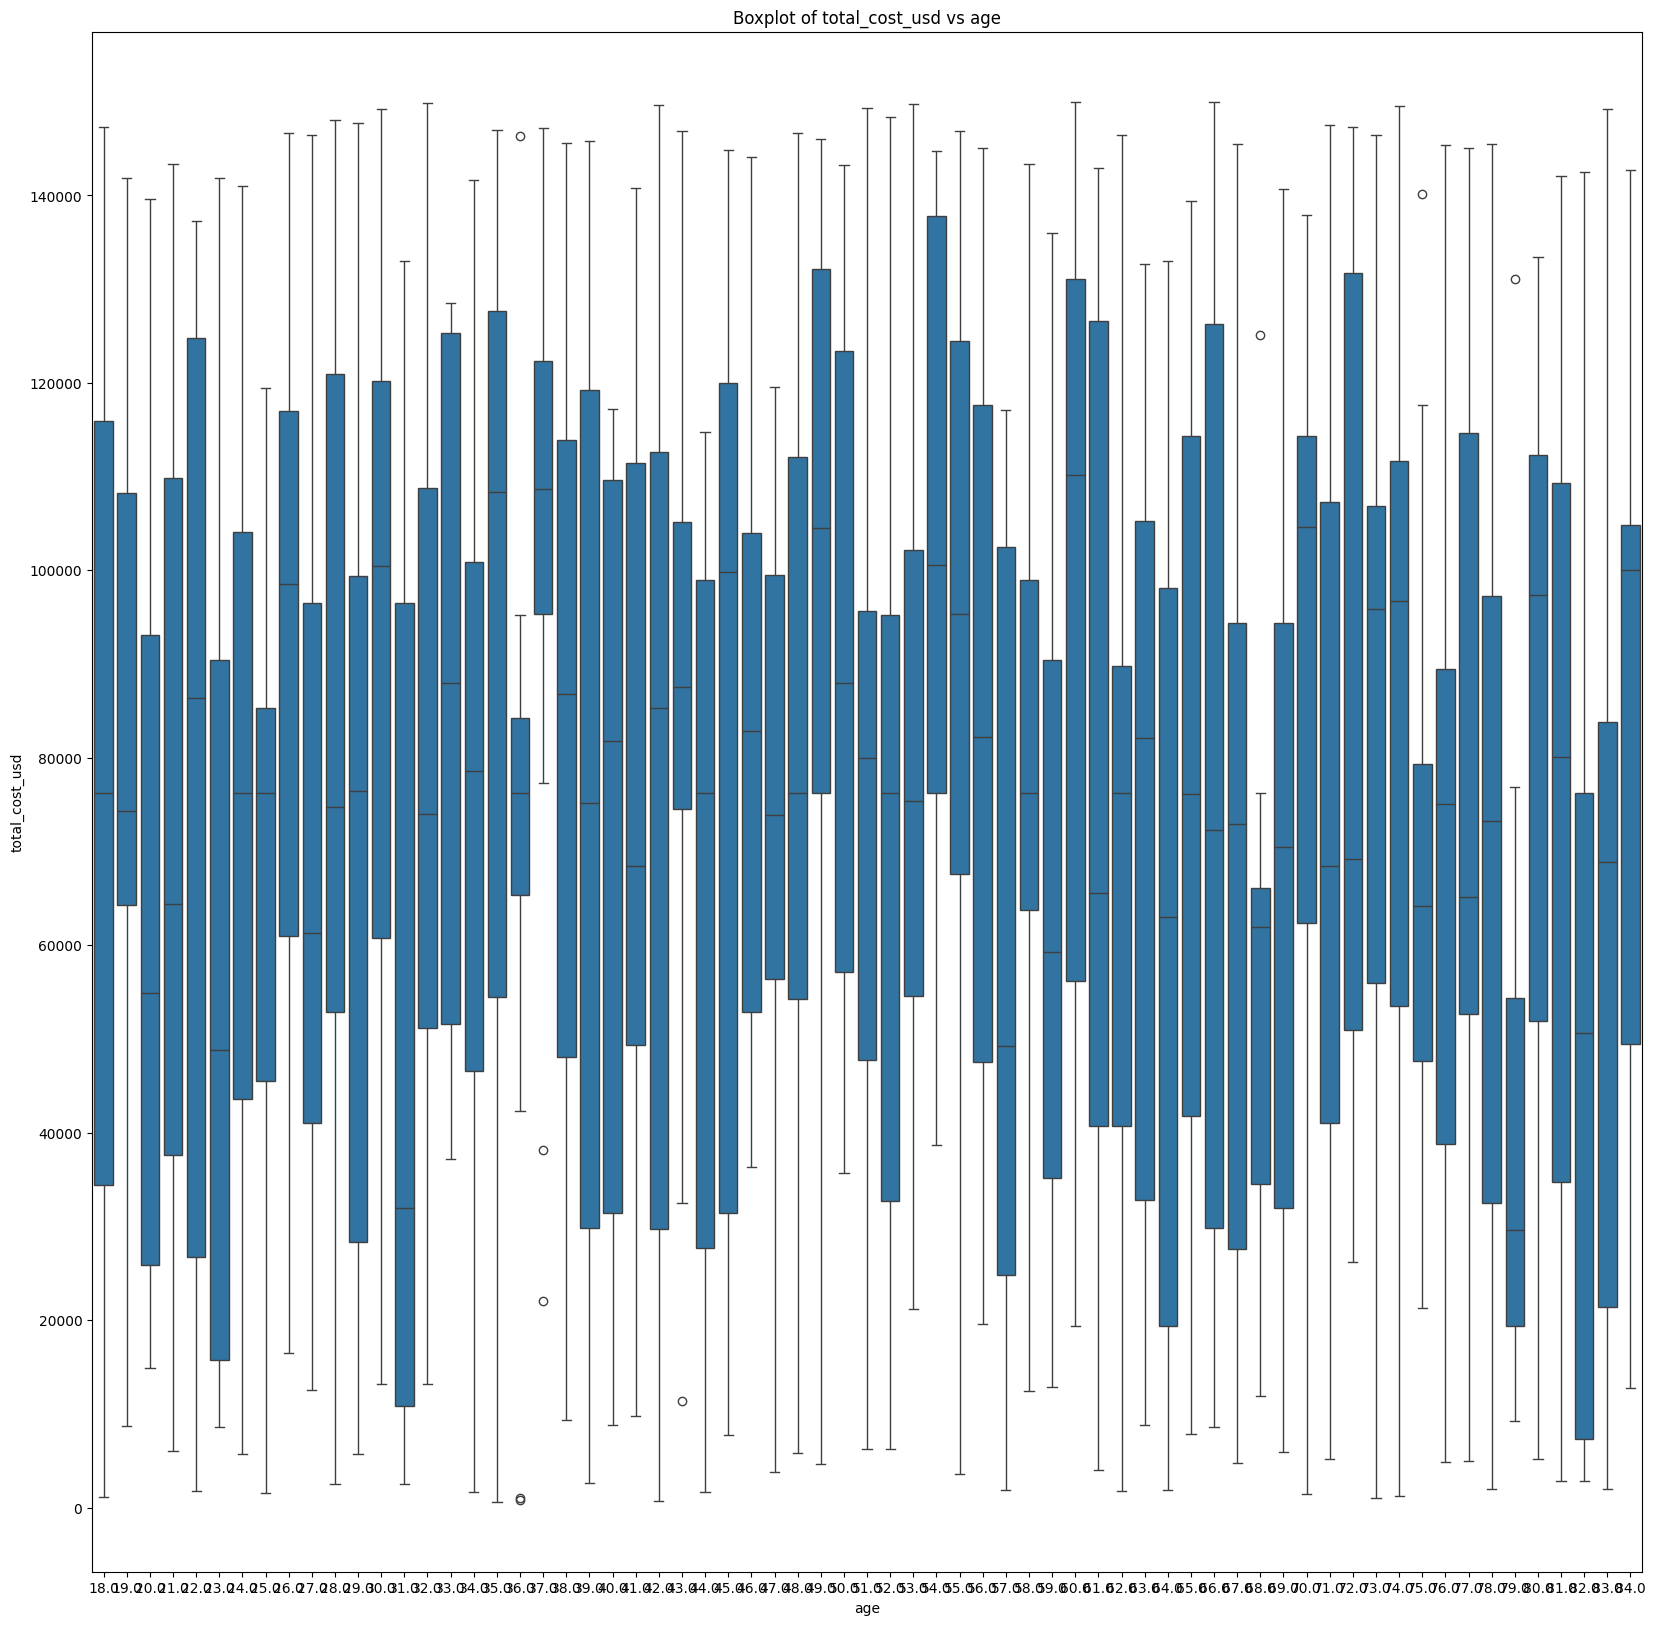

In [290]:
attribute = "age"
target = "total_cost_usd"

plt.figure(figsize=(20,20))
sns.boxplot(x=df[attribute], y=df[target])
plt.title(f"Boxplot of {target} vs {attribute}")
plt.show()

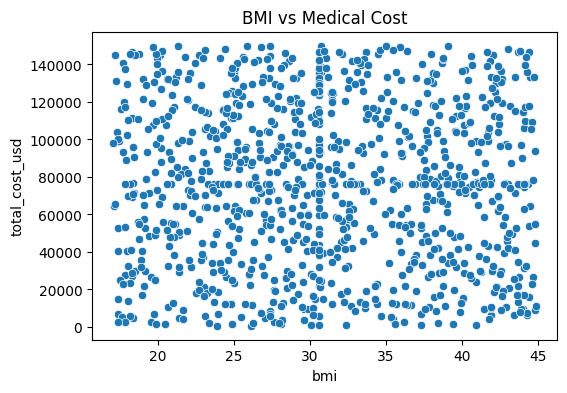

In [291]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='bmi', y='total_cost_usd', data=df)
plt.title("BMI vs Medical Cost")
plt.show()


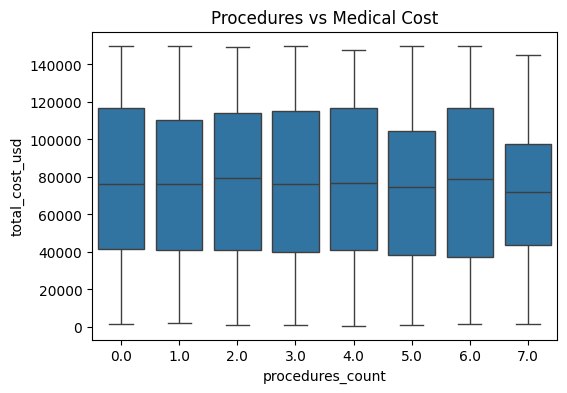

In [292]:
plt.figure(figsize=(6,4))
sns.boxplot(x='procedures_count', y='total_cost_usd', data=df)
plt.title("Procedures vs Medical Cost")
plt.show()


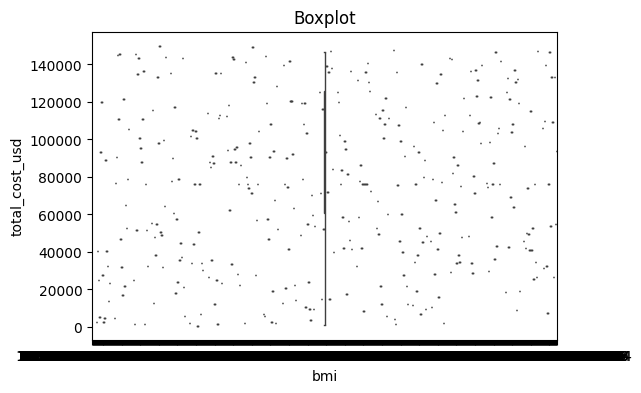

In [293]:
attribute = "bmi"
target = "total_cost_usd"

plt.figure(figsize=(6,4))
sns.boxplot(x=attribute, y=target, data=df)
plt.title("Boxplot")
plt.show()

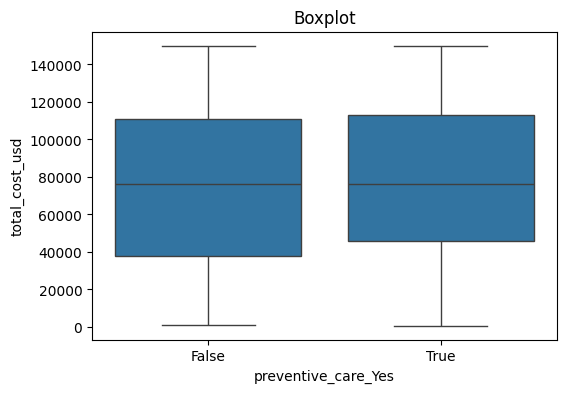

In [294]:
attribute = "preventive_care_Yes"
target = "total_cost_usd"

plt.figure(figsize=(6,4))
sns.boxplot(x=attribute, y=target, data=df)
plt.title("Boxplot")
plt.show()

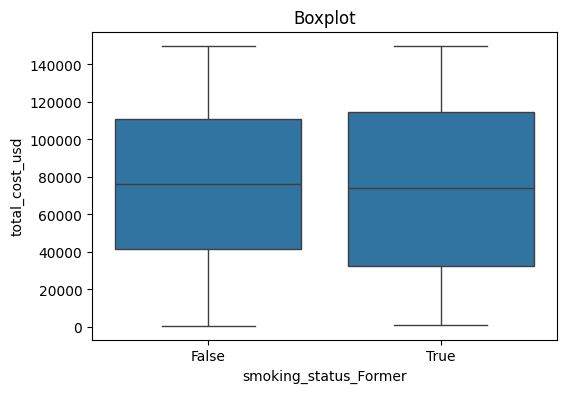

In [295]:
attribute = "smoking_status_Former"
target = "total_cost_usd"

plt.figure(figsize=(6,4))
sns.boxplot(x=attribute, y=target, data=df)
plt.title("Boxplot")
plt.show()

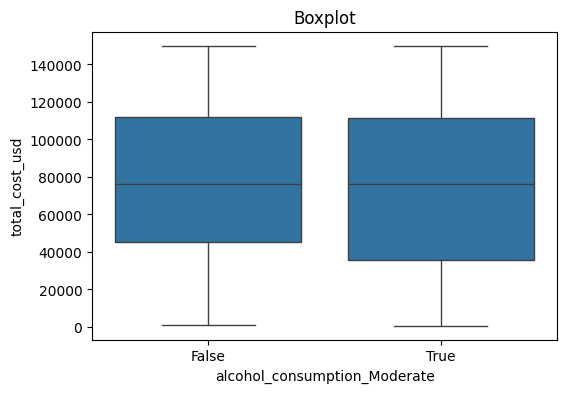

In [296]:
attribute = "alcohol_consumption_Moderate"
target = "total_cost_usd"

plt.figure(figsize=(6,4))
sns.boxplot(x=attribute, y=target, data=df)
plt.title("Boxplot")
plt.show()

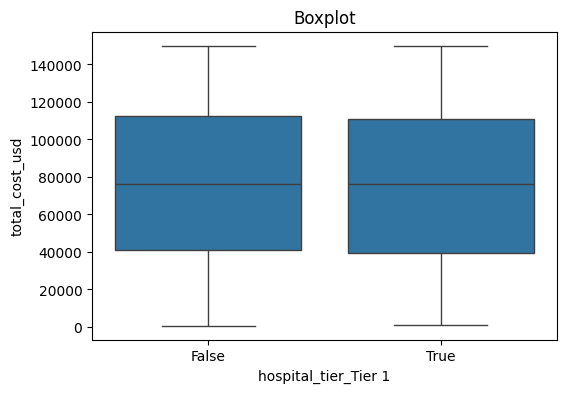

In [300]:
attribute = "hospital_tier_Tier 1"
target = "total_cost_usd"

plt.figure(figsize=(6,4))
sns.boxplot(x=attribute, y=target, data=df)
plt.title("Boxplot")
plt.show()

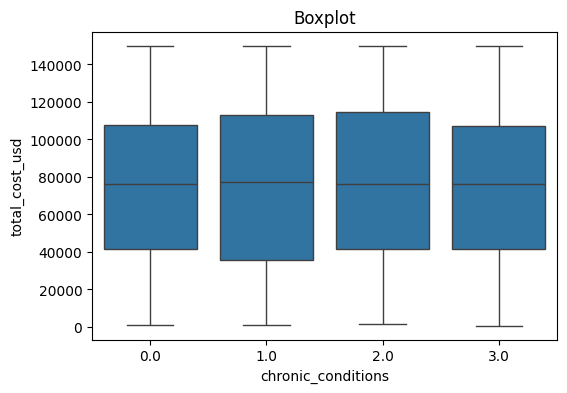

In [302]:
attribute = "chronic_conditions"
target = "total_cost_usd"

plt.figure(figsize=(6,4))
sns.boxplot(x=attribute, y=target, data=df)
plt.title("Boxplot")
plt.show()

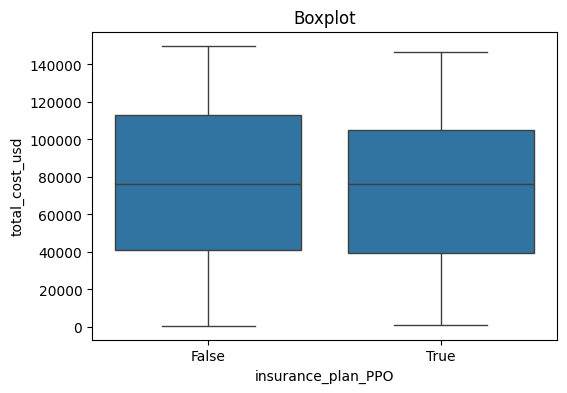

In [304]:
attribute = "insurance_plan_PPO"
target = "total_cost_usd"

plt.figure(figsize=(6,4))
sns.boxplot(x=attribute, y=target, data=df)
plt.title("Boxplot")
plt.show()

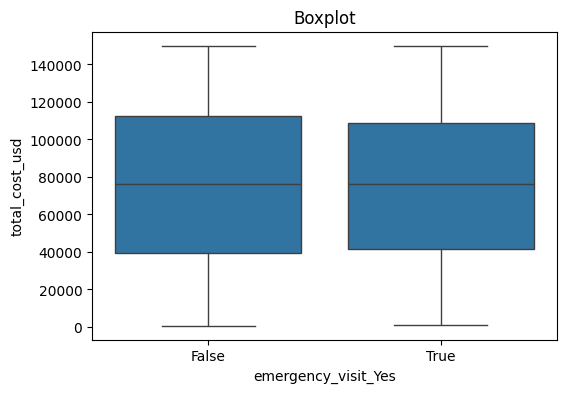

In [305]:
attribute = "emergency_visit_Yes"
target = "total_cost_usd"

plt.figure(figsize=(6,4))
sns.boxplot(x=attribute, y=target, data=df)
plt.title("Boxplot")
plt.show()

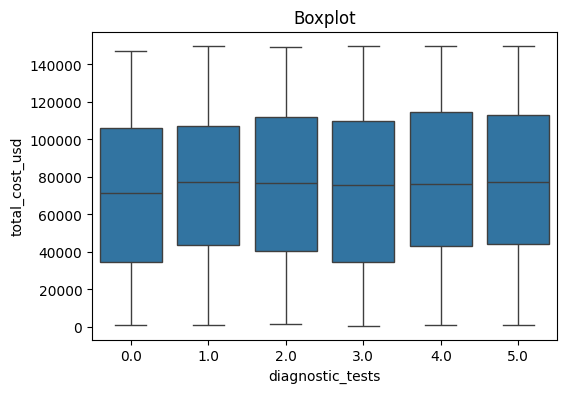

In [306]:
attribute = "diagnostic_tests"
target = "total_cost_usd"

plt.figure(figsize=(6,4))
sns.boxplot(x=attribute, y=target, data=df)
plt.title("Boxplot")
plt.show()

In [299]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['total_cost_usd'])
y = df['total_cost_usd']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("Model training completed successfully")


In [ ]:
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

In [ ]:
sns.scatterplot(x=y_test, y=y_pred)
plt.plot(y_test, y_test, color='red')
plt.show()

RANDOM REGRESSOR MODEL

In [ ]:
from sklearn.ensemble import RandomForestRegressor


In [ ]:
rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf_model.fit(X_train, y_train)


In [ ]:
y_pred_rf = rf_model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Random Forest Results")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))
